# Documentação

`!pip install yfinance`

### Artigo original:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Uso do Auto-ARIMA:
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd



## Requisitos
~~~python
!pip install yfinance
~~~

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [21]:
def get_finance_data(ticker, period='1y', interval='1d'):
    '''
    Função para capturar os dados dos ativos, acrescentar ".SA" no final do ticker para ativos 
    negociados na Bovespa, exemplo "PETR4.SA".
    Exemplo url base da API: https://query1.finance.yahoo.com/v7/finance/options/PETR4.SA?date=20201222
    Exemplo url scrape da API: https://finance.yahoo.com/quote/PETR4.SA
    
    Parameters
    ----------
    period: default '1y', periodos validos: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    inteval: default '1d', intervalos validos: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1d, 5d, 1wk, 1mo, 3mo.
    '''
    
    google = yf.Ticker(ticker)
    
    df = google.history(period=period, interval=interval)
#     df['date'] = pd.to_datetime(df.index).time
#     df.set_index('date', inplace=True)
    return df


def get_forecast(df, col_ref='Low'):
    # Assuming that we've properly trained the model before and that the 
    # hyperparameters are correctly tweaked, we use the full dataset to fit
    y = df[col_ref].values
    model = ARIMA(y, order=(5,1,3)).fit()
    forecast = model.forecast(steps=1)[0]

    # Returning the last real data and the forecast for the next minute
    return (y[len(y)-1], forecast)

In [30]:
ticker = "RBBV11.SA"
df = get_finance_data(ticker)[:-50]
get_forecast(df, col_ref='Low')

C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARM

(91.55000305175781, array([91.63498808]))

In [32]:
train

Date
2019-12-23    88.010002
2019-12-26    88.010002
2019-12-27    88.300003
2019-12-30    88.300003
2020-01-02    88.019997
                ...    
2020-10-05    92.500000
2020-10-06    91.550003
2020-10-07    91.550003
2020-10-08    92.800003
2020-10-09    91.550003
Name: Low, Length: 198, dtype: float64

In [28]:
ativo = yf.Ticker(ticker)

In [ ]:
ativo.get_dividends()

## Auto arima
#### Requisitos: 
~~~python
!pip install pmdarima
~~~

In [ ]:
#!pip install pmdarima

In [5]:
from pmdarima.arima import auto_arima

In [6]:
df = get_finance_data(ticker)

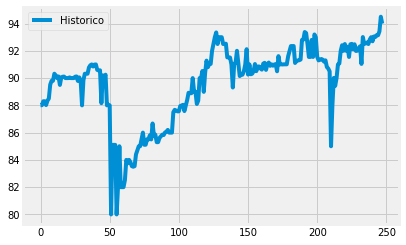

In [7]:
y = df['Low'].values
plt.plot(range(0,len(y)),y, label='Historico')
plt.legend()
plt.show()

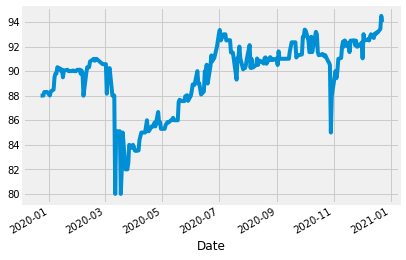

In [8]:
df['Low'].plot(label='Historico')

In [9]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df['Low'])

(0.5953610477639489, True)

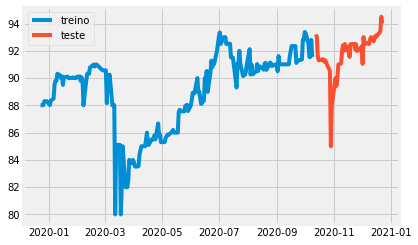

In [16]:
# train = df['Low'][:85]
train = df['Low'][:len(df)-50]
test = df['Low'][-50:]
plt.plot(train, label='treino')
plt.plot(test, label='teste')
plt.legend()
plt.show()

In [17]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, mas_d=5, max_q=5, start_P=0, D=1, start_Q=1, max_P=5, 
                         max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, suppress_warnings=True, 
                         stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=682.445, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=607.612, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=666.655, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=594.353, Time=0.22 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=590.421, Time=0.47 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=579.674, Time=1.05 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=575.370, Time=2.90 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=21.09 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=9.07 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=590.294, Time=2.77 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=567.267, Time=3.55 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=571.936, Time=1.41 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=inf, 

In [18]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  198
Model:             SARIMAX(5, 1, 3)x(5, 1, [], 12)   Log Likelihood                -258.470
Date:                             Wed, 23 Dec 2020   AIC                            544.940
Time:                                     20:30:48   BIC                            590.025
Sample:                                          0   HQIC                           563.212
                                             - 198                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7278      0.215     -3.392      0.001      -1.148      -0.307
ar.L2         -0.2028      0.314     -0.646      0.518      -0.818       0.412
ar.L3          0.4731      0.303      1.563      0.118      -0.120       1.066
ar.L4          0.4660      0.137      3.390      0.001       0.197       0.735
ar.L5          0.3850      0.121      3.184      0.001       0.148       0.622
ma.L1          0.3926      0.203      1.936      0.053      -0.005       0.790
ma.L2         -0.1122      0.255     -0.440      0.660      -0.612       0.387
ma.L3         -0.6453      0.217     -2.973      0.003      -1.071      -0.220
ar.S.L12      -0.9472      0.090    -10.542      0.000      -1.123      -0.771
ar.S.L24      -0.7332      0.124     -5.889      0.000      -0.977      -0.489
ar.S.L36      -0.6102      0.130     -4.695      0.000      -0.865      -0.355
ar.S.L48      -0.5397      0.096     -5.632      0.000      -0.727      -0.352
ar.S.L60      -0.2703      0.060     -4.474      0.000      -0.389      -0.152
sigma2         0.8681      0.078     11.162      0.000       0.716       1.021
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1642.60
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -2.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

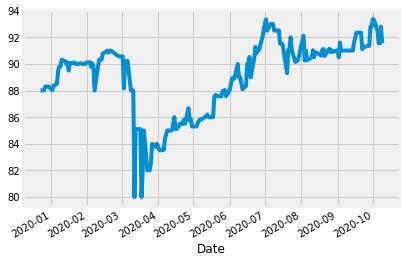

In [42]:
train.plot()

In [36]:
prd = pd.DataFrame(arima_model.predict(n_periods=50), index=test.index)
prd.columns = ['Low']
prd

,Low
Date,
2020-10-13,91.517507
2020-10-14,91.403977
2020-10-15,91.772168
2020-10-16,91.572883
2020-10-19,91.722911
2020-10-20,92.030727
2020-10-21,91.383915
2020-10-22,91.435178
2020-10-23,91.450911


<function matplotlib.pyplot.show(*args, **kw)>

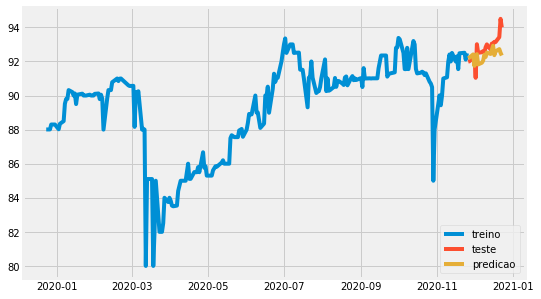

In [15]:
plt.figure(figsize=(8,5))
plt.plot(train, label="treino")
plt.plot(test, label="teste")
plt.plot(prd, label="predicao")
plt.legend(loc='lower right')
plt.show